# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys
    
    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract data and target
X, y = mnist.data, mnist.target

# Convert target to integers
y = y.astype(int)


In [5]:
# Print dataset dimensions and size
print(f"Dataset dimensions: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(set(y))}")


Dataset dimensions: (70000, 784)
Number of samples: 70000
Number of features: 784
Number of classes: 10


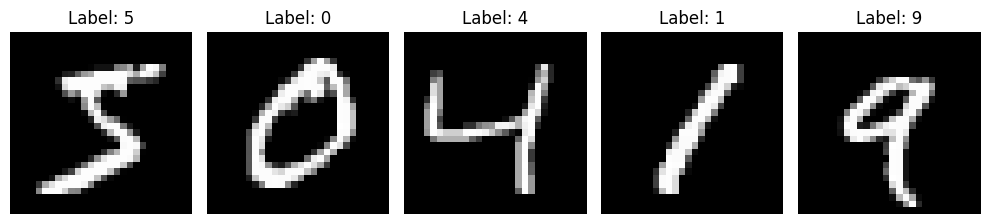

In [6]:
# Visualize sample digits from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the pixel values to range [0,1]
X = X / 255.0

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object and fit it on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

# Print the shapes of the resulting training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (56000, 784)
Test data shape: (14000, 784)
Training labels shape: (56000,)
Test labels shape: (14000,)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [8]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model using the training data
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
logistic_accuracy = logistic_model.score(X_test, y_test)
print(f"Logistic Regression Test Accuracy: {logistic_accuracy:.4f}")


Logistic Regression Test Accuracy: 0.9154


In [9]:
from sklearn.neural_network import MLPClassifier

# Train a Neural Network model using the training data
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), solver='adam', learning_rate_init=0.001, max_iter=200, random_state=42)
nn_model.fit(X_train, y_train)

# Evaluate the Neural Network model
nn_accuracy = nn_model.score(X_test, y_test)
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")


Neural Network Test Accuracy: 0.9712


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


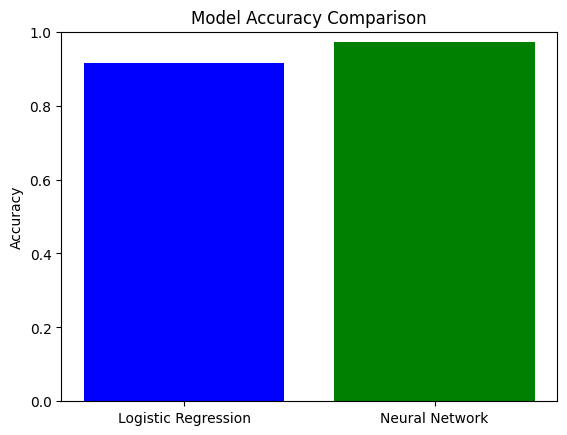

In [11]:
import matplotlib.pyplot as plt

# Compare the accuracy of both models
accuracies = [logistic_accuracy, nn_accuracy]
model_names = ['Logistic Regression', 'Neural Network']

# Create a bar plot
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_model.predict(X_test)))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_model.predict(X_test)))

# Neural Network metrics
print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_model.predict(X_test)))

print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_test, nn_model.predict(X_test)))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Logistic Regression Confusion Matrix:
[[1283    1   10    0    1   14   22    4    6    2]
 [   0 1555    6    9    3    5    1    4   14    3]
 [   5   19 1234   18   13   14   21   16   28   12]
 

Number of misclassified examples (Logistic Regression): 1184


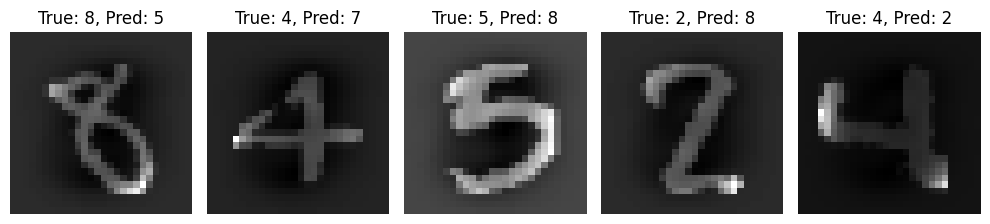

Number of misclassified examples (Neural Network): 403


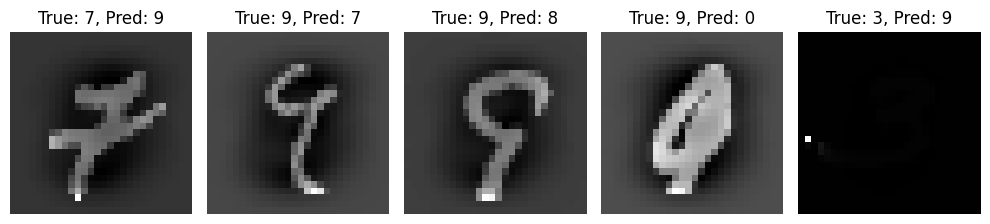

In [12]:
import numpy as np

# Logistic Regression misclassified examples
logistic_misclassified = np.where(logistic_model.predict(X_test) != y_test)[0]
print(f"Number of misclassified examples (Logistic Regression): {len(logistic_misclassified)}")

# Visualize first 5 misclassified examples for Logistic Regression
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    idx = logistic_misclassified[i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}, Pred: {logistic_model.predict(X_test[idx].reshape(1, -1))[0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Neural Network misclassified examples
nn_misclassified = np.where(nn_model.predict(X_test) != y_test)[0]
print(f"Number of misclassified examples (Neural Network): {len(nn_misclassified)}")

# Visualize first 5 misclassified examples for Neural Network
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    idx = nn_misclassified[i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}, Pred: {nn_model.predict(X_test[idx].reshape(1, -1))[0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
